<a href="https://colab.research.google.com/github/Shrutikapedamkar/british-airways-virtual-internship/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [79]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [48]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [49]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Horrible airline. Does not care...
1,✅ Trip Verified | My family and I have flown ...
2,✅ Trip Verified | This has been by far the wo...
3,✅ Trip Verified | In Nov 2022 I booked and pa...
4,Not Verified | BA is not treating its premium ...


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df.to_csv("/content/drive/MyDrive/British_Airways_Virtual_Internship/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [52]:
df.head()

,reviews
0,Not Verified | Horrible airline. Does not care...
1,✅ Trip Verified | My family and I have flown ...
2,✅ Trip Verified | This has been by far the wo...
3,✅ Trip Verified | In Nov 2022 I booked and pa...
4,Not Verified | BA is not treating its premium ...


## **Data Cleaning**

In [53]:
df['reviews'] = df.reviews.str.split('|', expand=True)[1]
df.head()

,reviews
0,Horrible airline. Does not care about their c...
1,My family and I have flown mostly on British...
2,This has been by far the worst service I hav...
3,In Nov 2022 I booked and paid for a return j...
4,BA is not treating its premium economy passen...


Cleaning the text

We will remoe all the special and numerical characters.

In [54]:
import re

def cleaning_text(text) :
  text = text.lower() #convert to lowercase
  text = re.sub('[^A-Za-z]+',' ', str(text)) #replacing non-alpha characters to space
  text = re.sub('\s',' ', text).strip() #remove whitespaces
  return text

df['cleaned_review'] = df['reviews'].apply(cleaning_text)
df.head()

,reviews,cleaned_review
0,Horrible airline. Does not care about their c...,horrible airline does not care about their cus...
1,My family and I have flown mostly on British...,my family and i have flown mostly on british a...
2,This has been by far the worst service I hav...,this has been by far the worst service i have ...
3,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey ...
4,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...


In [55]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [56]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [57]:
def lemmatization(text) :
  tokens = nltk.word_tokenize(text) #Tokenizing the sentence
  stop_word = set(stopwords.words('english')) #storing all the stopwords in english in stop_words
  filter_token = [word for word in tokens if word not in stop_word] #storing non stopwords in filter_token
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filter_token ] #Lemmatizing the tokens
  text = ' '.join(lemmatized_tokens) #Joining lemmatized tokens back to form a sentence
  return text

df['Lemmatized_text'] = df['cleaned_review'].apply(lemmatization)
df.head()

,reviews,cleaned_review,Lemmatized_text
0,Horrible airline. Does not care about their c...,horrible airline does not care about their cus...,horrible airline care customer used decent sin...
1,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,family flown mostly british airway last year p...
2,This has been by far the worst service I hav...,this has been by far the worst service i have ...,far worst service plane obvious flying economy...
3,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey ...,nov booked paid return journey new zealand ret...
4,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,ba treating premium economy passenger respect ...


## **LEXICON BASED METHOD**

**VADER (Valence Aware Dictionary and Sentiment Resoner)**

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [59]:
pip install vaderSentiment

In [60]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
analyze = SentimentIntensityAnalyzer()
#Calculating polarity score of each review
def sentiment_VADER(text):
  sentiment = analyze.polarity_scores(text)
  return sentiment['compound']

#Saving polarity score in the new column
df['Polarity Score'] = df['Lemmatized_text'].apply(sentiment_VADER)

In [62]:
df.head()

,reviews,cleaned_review,Lemmatized_text,Polarity Score
0,Horrible airline. Does not care about their c...,horrible airline does not care about their cus...,horrible airline care customer used decent sin...,-0.0772
1,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,family flown mostly british airway last year p...,0.9421
2,This has been by far the worst service I hav...,this has been by far the worst service i have ...,far worst service plane obvious flying economy...,0.1027
3,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey ...,nov booked paid return journey new zealand ret...,-0.5358
4,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,ba treating premium economy passenger respect ...,0.4404


In [63]:
def review_analyzer(score):
  if score >=0.5:
    return 'Positive review'
  elif score < 0:
    return 'Negative Review'
  else:
    return 'Neutral'

df['Review Analyzer'] = df['Polarity Score'].apply(review_analyzer)

In [64]:
df.head()

,reviews,cleaned_review,Lemmatized_text,Polarity Score,Review Analyzer
0,Horrible airline. Does not care about their c...,horrible airline does not care about their cus...,horrible airline care customer used decent sin...,-0.0772,Negative Review
1,My family and I have flown mostly on British...,my family and i have flown mostly on british a...,family flown mostly british airway last year p...,0.9421,Positive review
2,This has been by far the worst service I hav...,this has been by far the worst service i have ...,far worst service plane obvious flying economy...,0.1027,Neutral
3,In Nov 2022 I booked and paid for a return j...,in nov i booked and paid for a return journey ...,nov booked paid return journey new zealand ret...,-0.5358,Negative Review
4,BA is not treating its premium economy passen...,ba is not treating its premium economy passeng...,ba treating premium economy passenger respect ...,0.4404,Neutral


In [65]:
review_count = df['Review Analyzer'].value_counts()
review_count

Positive review    491
Negative Review    396
Neutral            113
Name: Review Analyzer, dtype: int64

# **Data Visualization**

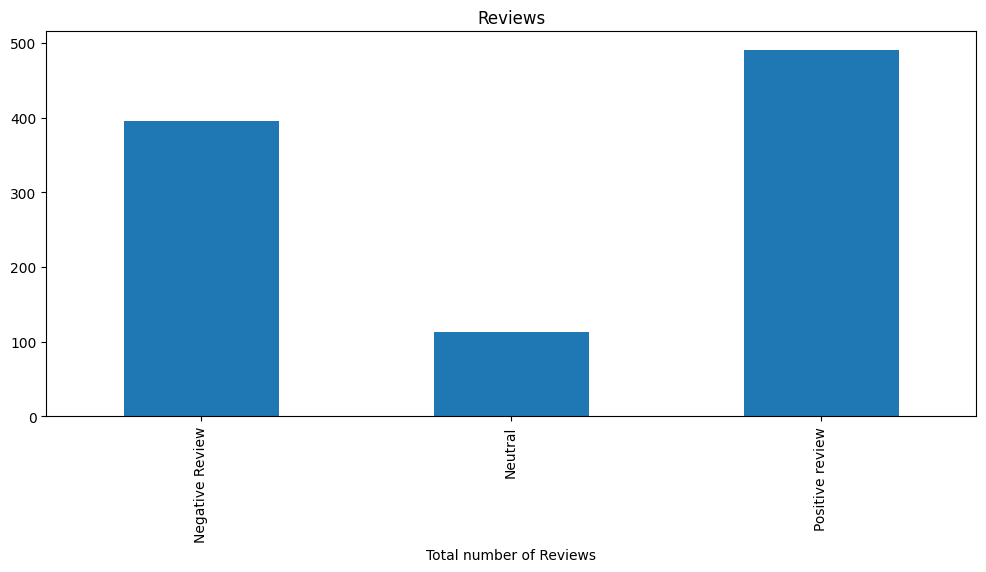

In [70]:


axis = df['Review Analyzer'].value_counts().sort_index() \
        .plot(kind='bar',
              title='Reviews',
              figsize=(12,5))
axis.set_xlabel('Total number of Reviews')
plt.show()

([<matplotlib.patches.Wedge at 0x7b05d4377850>,
 [Text(0.031097634977506766, 1.0995603380891865, 'Positive review'),
  Text(-0.41135515458462785, -1.0201896572680285, 'Negative Review'),
  Text(1.2658227549838803, -0.46924700634635863, 'Neutral')],
 [Text(0.016962346351367324, 0.5997601844122834, '49.1%'),
  Text(-0.22437553886434244, -0.5564670857825609, '39.6%'),
  Text(0.7969995123972579, -0.29545181881067023, '11.3%')])

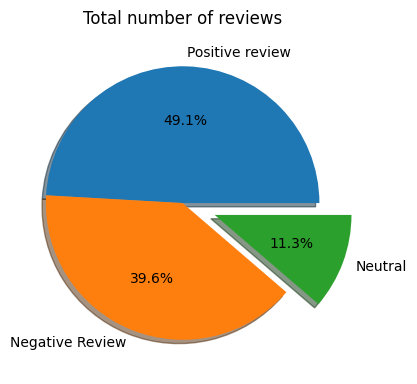

In [75]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,2)
plt.title('Total number of reviews')
plt.pie(review_count.values,
        labels=review_count.index,
        explode=(0,0,0.25),
         autopct='%1.1f%%',
        shadow=True)

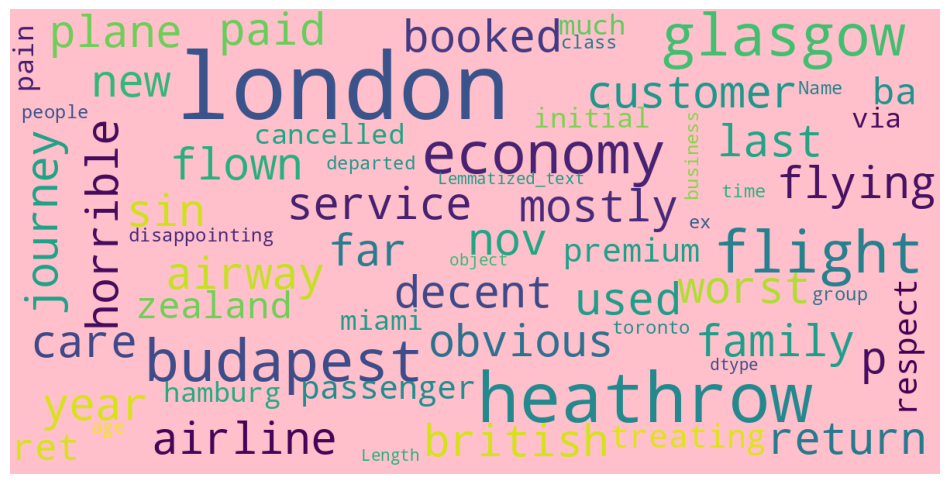

In [83]:
stopwords = set(STOPWORDS)

def wordcloud_display(data) :
  wordcloud = WordCloud(
      background_color = 'pink',
      stopwords = stopwords,
      max_words = 100,
      max_font_size = 40,
      scale =3,
      random_state =1
  )
  wordcloud = wordcloud.generate(str(data))
  figure = plt.figure(1, figsize=(12,12))
  plt.axis('off')
  plt.imshow(wordcloud)
  plt.show()

wordcloud_display(df.Lemmatized_text)